In [ ]:
!pip install transformers pdfplumber torch

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu
No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Device set to use cpu


tokenizer_config.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/31.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


pytorch_model.bin:   0%|          | 0.00/242M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

📄 Please enter the path to your study notes PDF file: /content/NLP_Summary_Guide_Enhanced.pdf



✅ PDF text extracted.



Your max_length is set to 142, but your input_length is only 70. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=35)


📝 Summary:
🔹 1. Natural Language Processing (NLP) is a branch of artificial intelligence that helps computers understand, interpret, and respond to human language in a valuable way. It combines computational linguistics with machine learning and deep learning models. Popular Use Cases: Voice-activated assistants (e.g., Siri, Google Assistant) - Translation tools - Email spam filters - Social media monitoring.

🔹 2. Before NLP models can be applied, text must be cleaned and structured. Embeddings capture semantic meaning. Machine Translation: Converts text from one language to another. Traditional & Deep Learning Models: Naive Bayes, Decision Trees, CNNs, RNNs, LSTMs.

🔹 3.  Sequence Labeling Used for tasks like POS tagging and NER. Approaches: - HMMs: Use states and probabilities - CRFs: Consider sequential dependencies. Transformer Revolution Transformers introduced attention mechanisms to capture relationships without recurrence. Notable Models: - BERT: Understands bidirectional cont

<ipython-input-3-b8e2c8a2b4eb>:118: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


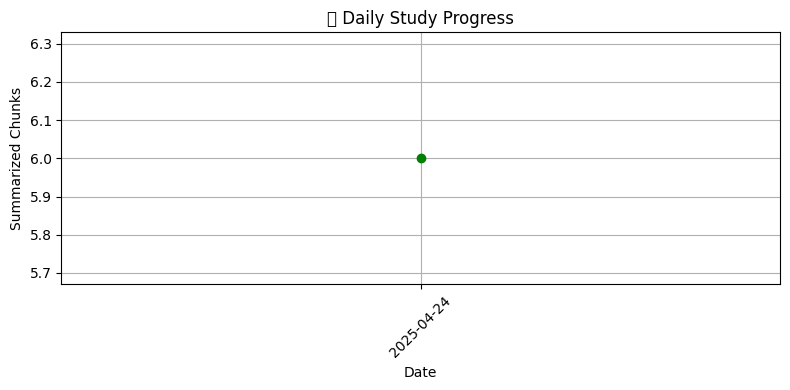

In [ ]:
import pdfplumber, os, datetime, json, random
import matplotlib.pyplot as plt
from transformers import pipeline, AutoTokenizer, T5ForConditionalGeneration

# --- Load Models ---
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
qa_pipeline = pipeline("question-answering")
qg_tokenizer = AutoTokenizer.from_pretrained("valhalla/t5-small-qg-prepend")
qg_model = T5ForConditionalGeneration.from_pretrained("valhalla/t5-small-qg-prepend")

progress_file = "study_progress.json"

# --- Extract Text ---
def extract_text_from_pdf(pdf_path):
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            page_text = page.extract_text()
            if page_text:
                text += page_text + "\n"
    return text.strip()

# --- Summarize Text ---
def summarize_text(text):
    text = text.replace("\n", " ")
    sentences = text.split('. ')
    chunks = []
    temp = ""
    for sentence in sentences:
        temp += sentence + '. '
        if len(temp) > 900:
            chunks.append(temp.strip())
            temp = ""
    if temp:
        chunks.append(temp.strip())

    summaries, key_points = [], []
    for chunk in chunks:
        try:
            summary = summarizer(chunk)[0]['summary_text']
            summaries.append(summary)
            key_points += [pt.strip().capitalize() + '.' for pt in summary.split('.') if len(pt.strip()) > 10]
        except:
            continue
    return summaries, key_points

# --- Flashcards ---
def generate_flashcards(text, n=5):
    sentences = [s.strip() for s in text.replace("\n", " ").split('.') if len(s.strip()) > 10]
    return [(f"What does the following sentence mean: '{sentences[i]}'?", sentences[i + 1].capitalize() + '.') for i in range(min(n, len(sentences) - 1))]

# --- Generate MCQs ---
def generate_mcq(text, num_questions=5):
    sentences = [s.strip() for s in text.replace("\n", " ").split('.') if len(s.strip()) > 20]
    questions = []
    for i in range(min(num_questions, len(sentences) - 3)):
        context = ". ".join(sentences[i:i+3])
        answer = qa_pipeline(question="What is this passage about?", context=context).get('answer', '').strip()
        if not answer or len(answer.split()) < 2:
            continue

        input_ids = qg_tokenizer.encode("generate question: " + context, return_tensors="pt")
        outputs = qg_model.generate(input_ids)
        question = qg_tokenizer.decode(outputs[0], skip_special_tokens=True)

        distractors = []
        while len(distractors) < 3:
            cand = random.choice(sentences)
            if answer.lower() not in cand.lower() and cand not in distractors:
                distractors.append(cand.strip().capitalize() + '.')

        options = distractors + [answer.strip().capitalize() + '.']
        random.shuffle(options)
        questions.append({
            "question": question.strip().capitalize() + '.',
            "options": options,
            "answer": answer.strip().capitalize() + '.'
        })
    return questions

# --- QA pairs from chunks ---
def generate_qa_pairs(text, n=5):
    sentences = [s.strip() for s in text.replace("\n", " ").split('.') if len(s.strip()) > 30]
    qa_pairs = []
    for i in range(min(n, len(sentences) - 3)):
        context = ". ".join(sentences[i:i+3])
        input_ids = qg_tokenizer.encode("generate question: " + context, return_tensors="pt")
        outputs = qg_model.generate(input_ids)
        question = qg_tokenizer.decode(outputs[0], skip_special_tokens=True)
        answer = qa_pipeline(question=question, context=context)['answer'].strip()
        qa_pairs.append((question.strip().capitalize(), answer.strip().capitalize() + '.'))
    return qa_pairs

# --- Context-Aware QA ---
def answer_question(context, question):
    return qa_pipeline(question=question, context=context)['answer'].strip().capitalize() + '.'

# --- Save and Plot Progress ---
def save_progress(summary_count):
    today = str(datetime.date.today())
    progress = json.load(open(progress_file)) if os.path.exists(progress_file) else {}
    progress[today] = progress.get(today, 0) + summary_count
    with open(progress_file, 'w') as f: json.dump(progress, f)

def plot_progress():
    if not os.path.exists(progress_file):
        print("No study progress recorded yet.")
        return
    with open(progress_file, 'r') as f:
        progress = json.load(f)
    plt.figure(figsize=(8, 4))
    plt.plot(progress.keys(), progress.values(), marker='o', color='green')
    plt.title("\U0001F4CA Daily Study Progress")
    plt.xlabel("Date")
    plt.ylabel("Summarized Chunks")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# --- MAIN PROGRAM ---
pdf_path = input("📄 Please enter the path to your study notes PDF file: ").strip()
if os.path.exists(pdf_path) and pdf_path.lower().endswith('.pdf'):
    full_text = extract_text_from_pdf(pdf_path)
    print("\n✅ PDF text extracted.\n")

    # Summary & Key Points
    summaries, key_points = summarize_text(full_text)
    print("📝 Summary:")
    for i, s in enumerate(summaries, 1): print(f"🔹 {i}. {s}\n")
    print("🔑 Key Points:")
    for i, kp in enumerate(key_points, 1): print(f"  • {kp}")
    save_progress(len(summaries))

    # Flashcards
    print("\n🧠 Flashcards:")
    for q, a in generate_flashcards(full_text): print(f"Q: {q}\nA: {a}\n")

    # MCQ Quiz
    print("❓ Quiz Questions (5 MCQs):")
    mcqs = generate_mcq(full_text)
    score = 0
    for i, q in enumerate(mcqs, 1):
        print(f"\n{i}. {q['question']}")
        for j, opt in enumerate(q['options']):
            print(f"   {chr(65 + j)}. {opt}")
        user_ans = input("👉 Your answer (A/B/C/D): ").upper()
        correct = chr(65 + q['options'].index(q['answer']))
        if user_ans == correct:
            print("✅ Correct!\n")
            score += 1
        else:
            print(f"❌ Incorrect! Correct answer: {correct}. {q['answer']}\n")

    # Auto-generated Q&A
    print("\n📚 Question & Answer Pairs:")
    for i, (q, a) in enumerate(generate_qa_pairs(full_text), 1):
        print(f"{i}. Q: {q}\n   A: {a}\n")

    # Context-aware Q&A
    print("\n🎯 Ask Questions from Your Study Notes")
    while True:
        user_question = input("🔎 Your Question (or type 'exit'): ").strip()
        if user_question.lower() == 'exit':
            break
        print("💡 Answer:", answer_question(full_text, user_question), "\n")

    # Show performance
    print(f"🏁 Quiz Completed. You scored {score}/{len(mcqs)}")
    print("📈 Plotting your daily study progress...\n")
    plot_progress()
else:
    print("❌ Invalid PDF path. Please enter a valid path to your PDF file.")